In [3]:
pip install pandas numpy matplotlib seaborn yfinance


Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Define the file path
file_path = r"C:\Users\samjo\Downloads\IDFC.NS.csv"

# Read the CSV file
idfc_data = pd.read_csv(file_path)



C:\Users\samjo\AppData\Local\Temp\ipykernel_13920\54696145.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  idfc_data['Momentum'] = idfc_data['Close'].pct_change(periods=10)  # 10-day momentum


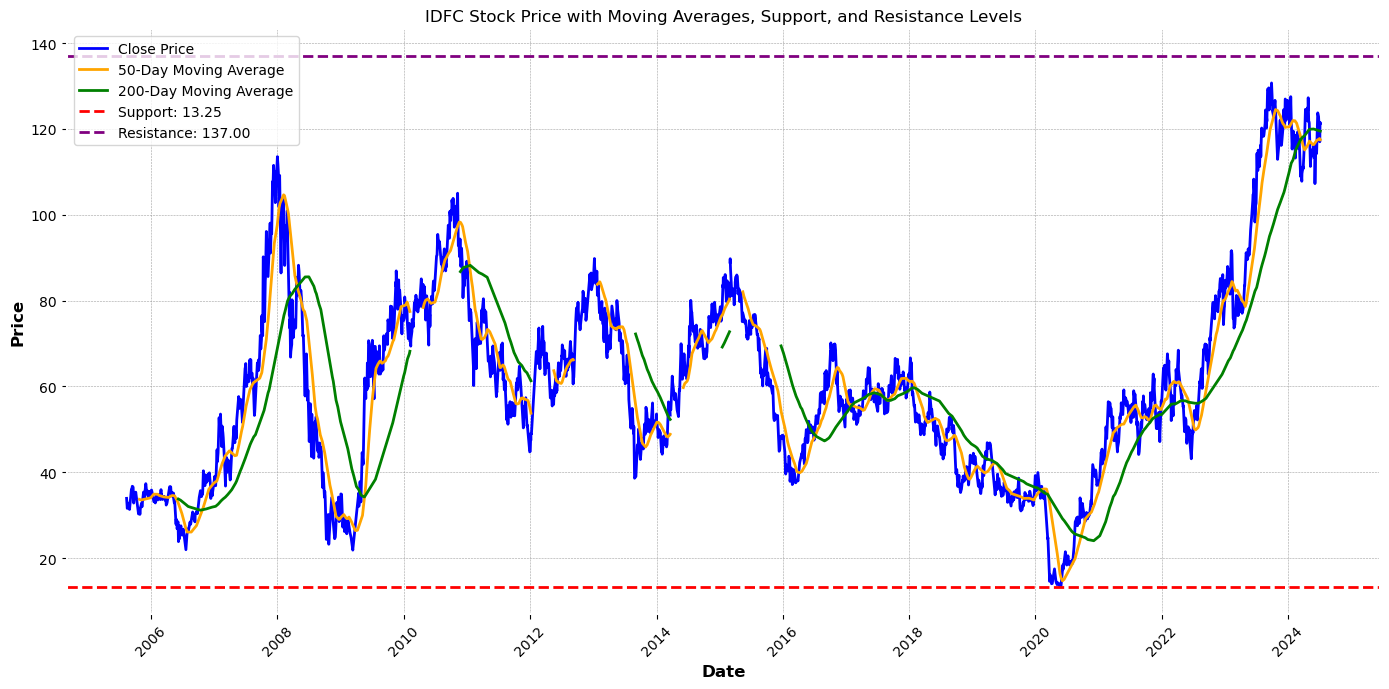

In [52]:
# Ensure the Date column is in datetime format
idfc_data['Date'] = pd.to_datetime(idfc_data['Date'])

# Sort the data by date
idfc_data.sort_values('Date', inplace=True)

# Calculate support and resistance levels
support = idfc_data['Low'].min()
resistance = idfc_data['High'].max()

# Calculate Momentum (Rate of Change)
idfc_data['Momentum'] = idfc_data['Close'].pct_change(periods=10)  # 10-day momentum

# Calculate Moving Averages
idfc_data['MA50'] = idfc_data['Close'].rolling(window=50).mean()   # 50-day moving average
idfc_data['MA200'] = idfc_data['Close'].rolling(window=200).mean() # 200-day moving average

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(idfc_data['Date'], idfc_data['Close'], label='Close Price', color='blue')
plt.plot(idfc_data['Date'], idfc_data['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(idfc_data['Date'], idfc_data['MA200'], label='200-Day Moving Average', color='green')

# Plot support and resistance lines
plt.axhline(y=support, color='red', linestyle='--', label=f'Support: {support:.2f}')
plt.axhline(y=resistance, color='purple', linestyle='--', label=f'Resistance: {resistance:.2f}')

plt.title('IDFC Stock Price with Moving Averages, Support, and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [18]:
# Display the last few rows to show the calculations
idfc_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Momentum,MA50,MA200
Date,,,,,,,,,
2024-07-01,122.900002,122.900002,119.970001,120.129997,120.129997,13813415.0,0.045791,117.7482,119.64030
2024-07-02,120.500000,120.900002,116.260002,116.989998,116.989998,14235100.0,-0.032021,117.6490,119.57900
2024-07-03,117.580002,120.400002,115.750000,120.260002,120.260002,6495916.0,-0.007100,117.5972,119.54005
2024-07-04,120.800003,122.599998,119.120003,121.510002,121.510002,4881277.0,-0.017942,117.5504,119.51160
2024-07-05,120.650002,122.110001,120.599998,121.300003,121.300003,3464439.0,-0.013500,117.4774,119.47760


C:\Users\samjo\AppData\Local\Temp\ipykernel_13920\4092889114.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_week_data['Momentum'] = previous_week_data['Close'].pct_change(periods=10)  # 10-day momentum
C:\Users\samjo\AppData\Local\Temp\ipykernel_13920\4092889114.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_week_data['MA50'] = previous_week_data['Close'].rolling(window=50).mean()   # 50-day moving average
C:\Users\samjo\AppData\Local\Temp\ipykernel_13920\4092889114.py:19: Sett

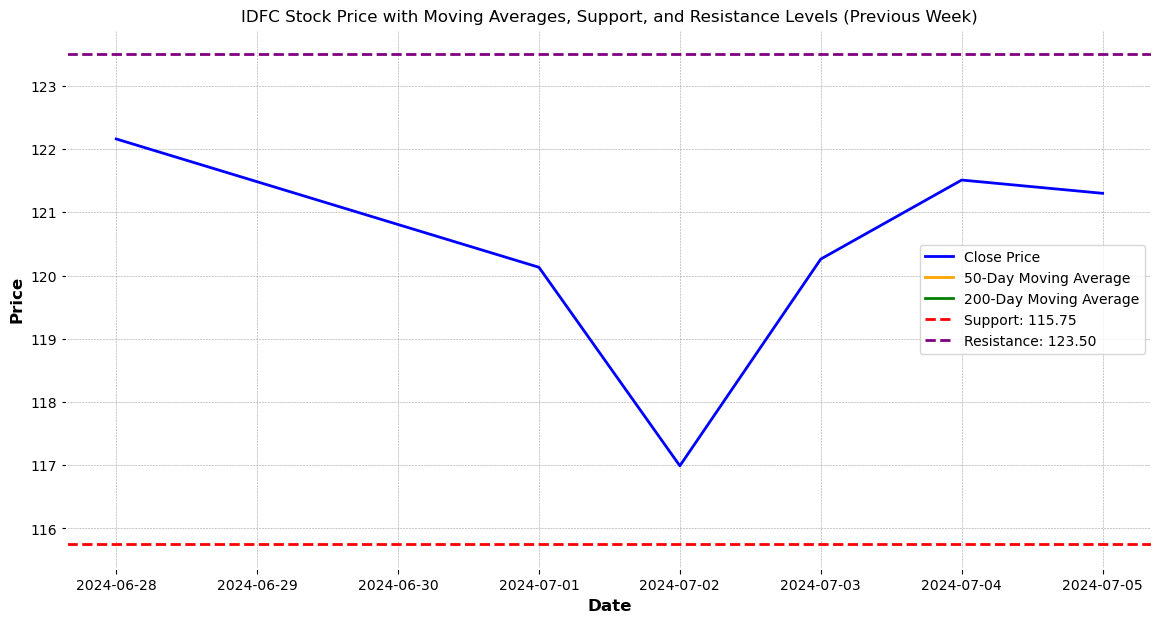

In [46]:
# Ensure the Date column is in datetime format
idfc_data['Date'] = pd.to_datetime(idfc_data['Date'])

# Sort the data by date
idfc_data.sort_values('Date', inplace=True)

# Select data for the previous week
previous_week_data = idfc_data[idfc_data['Date'] >= idfc_data['Date'].max() - pd.DateOffset(weeks=1)]

# Calculate support and resistance levels for the previous week only
support = previous_week_data['Low'].min()
resistance = previous_week_data['High'].max()

# Calculate Momentum (Rate of Change)
previous_week_data['Momentum'] = previous_week_data['Close'].pct_change(periods=10)  # 10-day momentum

# Calculate Moving Averages
previous_week_data['MA50'] = previous_week_data['Close'].rolling(window=50).mean()   # 50-day moving average
previous_week_data['MA200'] = previous_week_data['Close'].rolling(window=200).mean() # 200-day moving average

# Plot the data for the previous week
plt.figure(figsize=(14, 7))
plt.plot(previous_week_data['Date'], previous_week_data['Close'], label='Close Price', color='blue')
plt.plot(previous_week_data['Date'], previous_week_data['MA50'], label='50-Day Moving Average', color='orange')
plt.plot(previous_week_data['Date'], previous_week_data['MA200'], label='200-Day Moving Average', color='green')

# Plot support and resistance lines for the previous week
plt.axhline(y=support, color='red', linestyle='--', label=f'Support: {support:.2f}')
plt.axhline(y=resistance, color='purple', linestyle='--', label=f'Resistance: {resistance:.2f}')

plt.title('IDFC Stock Price with Moving Averages, Support, and Resistance Levels (Previous Week)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\samjo\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


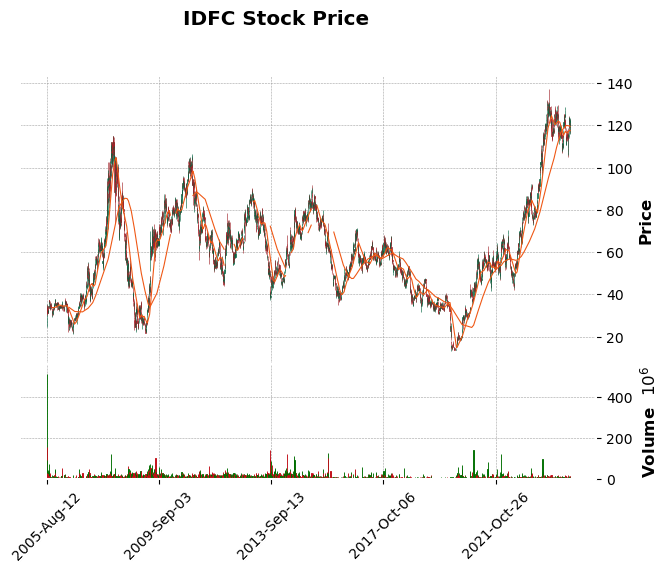

In [19]:
import mplfinance as mpf
mpf.plot(idfc_data, type='candle', style='charles', title='IDFC Stock Price', volume=True, mav=(50, 200))

T-test: t-statistic = -22.95065548717584, p-value = 9.760925730762876e-91
ANOVA test: F-statistic = 176.92473775871616, p-value = 1.021899527101956e-88


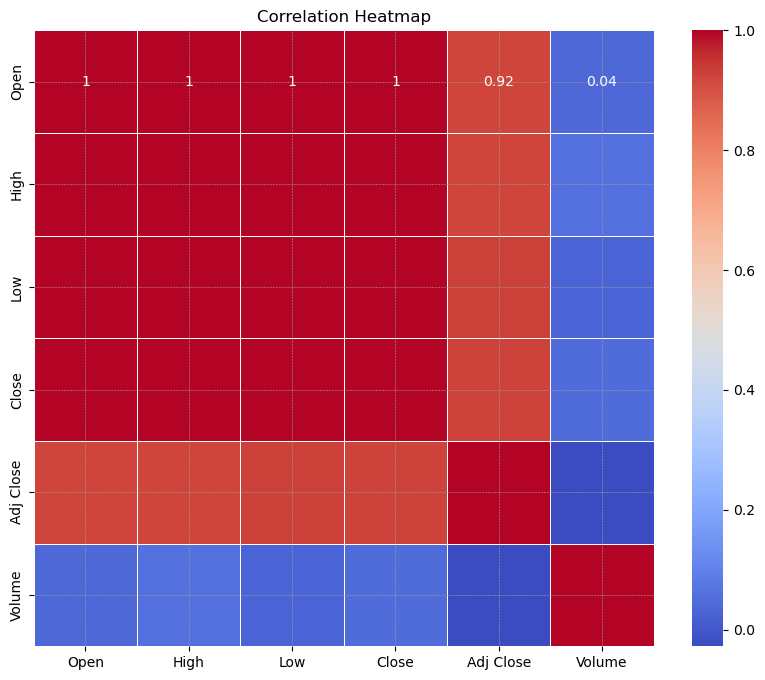

In [22]:
import scipy.stats as stats
import seaborn as sns
# Assuming we have two periods for the T-test: 2005-2006 and 2007-2008
period1 = idfc_data['2005-08':'2006-12']['Close']
period2 = idfc_data['2007-01':'2008-12']['Close']

# Independent T-test
t_stat, p_val_ttest = stats.ttest_ind(period1.dropna(), period2.dropna())
print(f'T-test: t-statistic = {t_stat}, p-value = {p_val_ttest}')

# ANOVA test for multiple years (e.g., 2005, 2006, 2007, 2008)
idfc_data['Year'] = idfc_data.index.year
anova_data = [group['Close'].dropna() for name, group in idfc_data.groupby('Year') if name in [2005, 2006, 2007, 2008]]
f_stat, p_val_anova = stats.f_oneway(*anova_data)
print(f'ANOVA test: F-statistic = {f_stat}, p-value = {p_val_anova}')

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = idfc_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\samjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samjo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

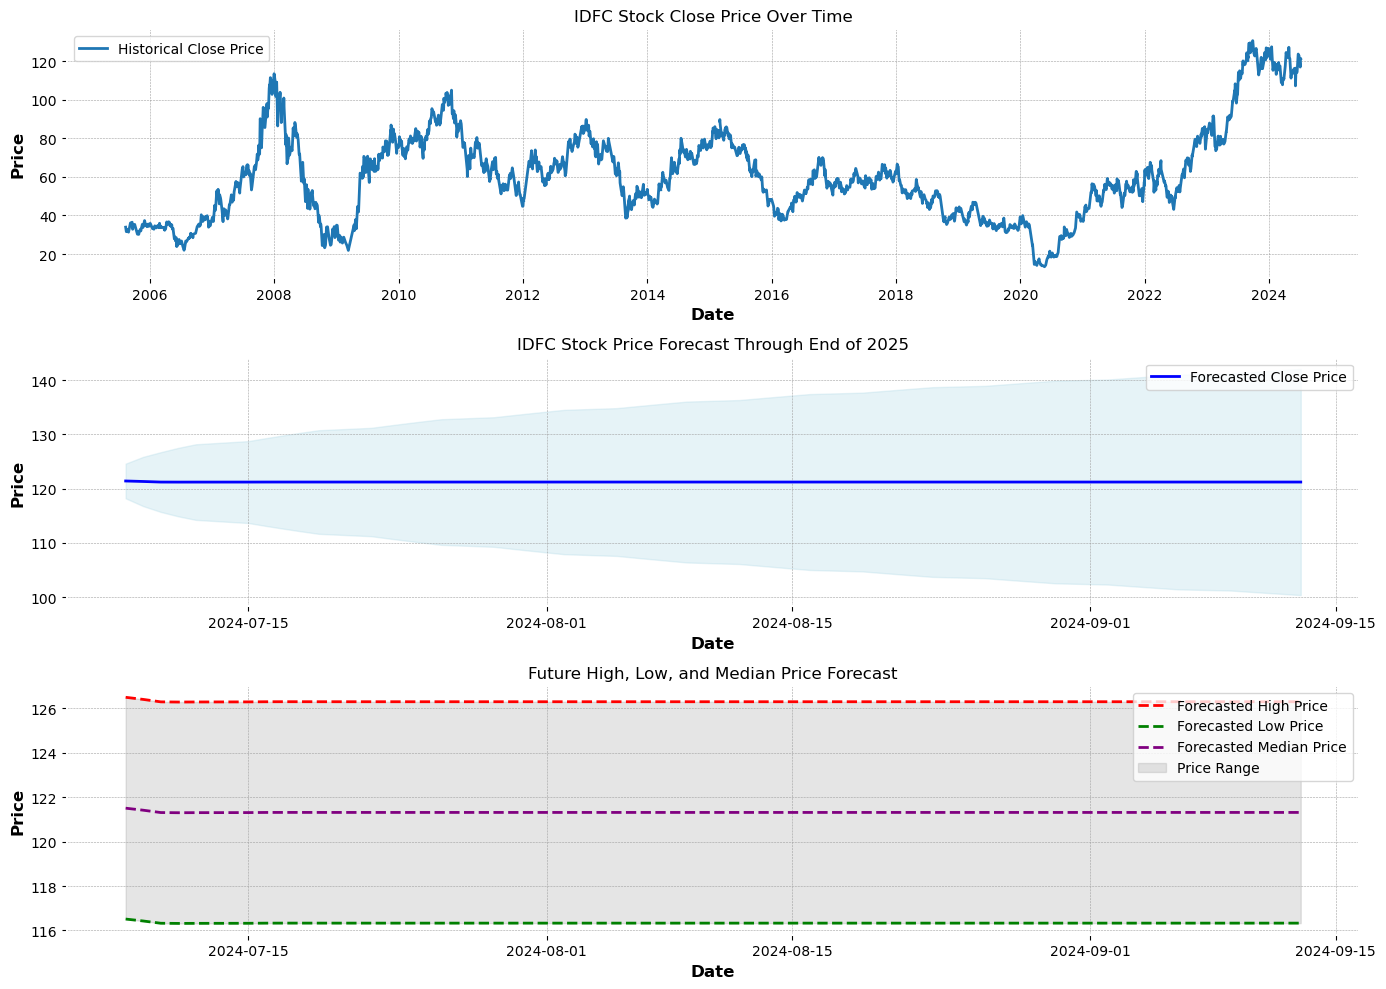

,Date,Forecast Close,Forecast High,Forecast Low,Forecast Median,Lower CI,Upper CI
4705,2024-09-02,121.207459,126.289902,116.329555,121.309729,102.300134,140.114784
4706,2024-09-03,121.207459,126.289902,116.329555,121.309729,102.074367,140.340551
4707,2024-09-04,121.207459,126.289902,116.329555,121.309729,101.851233,140.563685
4708,2024-09-05,121.207459,126.289902,116.329555,121.309729,101.630642,140.784276
4709,2024-09-06,121.207459,126.289902,116.329555,121.309729,101.412509,141.002409
4710,2024-09-09,121.207459,126.289902,116.329555,121.309729,101.196754,141.218164
4711,2024-09-10,121.207459,126.289902,116.329555,121.309729,100.983300,141.431618
4712,2024-09-11,121.207459,126.289902,116.329555,121.309729,100.772076,141.642842
4713,2024-09-12,121.207459,126.289902,116.329555,121.309729,100.563012,141.851906
4714,2024-09-13,121.207459,126.289902,116.329555,121.309729,100.356045,142.058873


In [24]:
from statsmodels.tsa.arima.model import ARIMA


# Fit ARIMA model
model = ARIMA(idfc_data['Close'], order=(5, 1, 0))  # Example parameters (p, d, q)
model_fit = model.fit()

# Forecasting the future (up to December 2025)
forecast_steps = 30 * (2025 - 2024) + 20  # Number of business days from January 2024 to December 2025
future_forecast_object = model_fit.get_forecast(steps=forecast_steps)
future_forecast = future_forecast_object.predicted_mean
future_conf_int = future_forecast_object.conf_int()

# Generating future dates
future_dates = pd.date_range(start=idfc_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Estimate future high, low, and median prices
# Historical statistics
historical_high_low_ratio = idfc_data['High'] / idfc_data['Low']
historical_median = (idfc_data['High'] + idfc_data['Low']) / 2

# Calculate average historical high/low ratio and median
avg_high_low_ratio = historical_high_low_ratio.mean()
avg_median = historical_median.mean()

# Predict future high and low prices
future_high = future_forecast * avg_high_low_ratio
future_low = future_forecast / avg_high_low_ratio
future_median = (future_high + future_low) / 2

# Plot the historical data and future forecast
plt.figure(figsize=(14, 10))

# Plot historical data
plt.subplot(3, 1, 1)
plt.plot(idfc_data['Close'], label='Historical Close Price')
plt.title('IDFC Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot future forecast
plt.subplot(3, 1, 2)
plt.plot(future_dates, future_forecast, color='blue', label='Forecasted Close Price')
plt.fill_between(future_dates, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.title('IDFC Stock Price Forecast Through End of 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot future high, low, and median
plt.subplot(3, 1, 3)
plt.plot(future_dates, future_high, color='red', linestyle='--', label='Forecasted High Price')
plt.plot(future_dates, future_low, color='green', linestyle='--', label='Forecasted Low Price')
plt.plot(future_dates, future_median, color='purple', linestyle='--', label='Forecasted Median Price')
plt.fill_between(future_dates, future_high, future_low, color='gray', alpha=0.2, label='Price Range')
plt.title('Future High, Low, and Median Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# Print the last few forecasted values for close, high, low, and median
forecast_results = pd.DataFrame({
    'Date': future_dates,
    'Forecast Close': future_forecast,
    'Forecast High': future_high,
    'Forecast Low': future_low,
    'Forecast Median': future_median,
    'Lower CI': future_conf_int.iloc[:, 0],
    'Upper CI': future_conf_int.iloc[:, 1]
})

forecast_results.tail(10) # Display the last 10 rows of the forecast results


In [65]:
# Sort the data by date
idfc_data.sort_values('Date', inplace=True)

# Select data for the previous week
previous_week_data = idfc_data[idfc_data['Date'] >= idfc_data['Date'].max() - pd.DateOffset(weeks=1)]

# Calculate support and resistance levels for the previous week only
support = previous_week_data['Low'].min()
resistance = previous_week_data['High'].max()

# Calculate 10-day Momentum (Rate of Change) for the previous week
previous_week_data['Momentum'] = previous_week_data['Close'].pct_change(periods=10)  

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("IDFC Stock Analysis Dashboard"),
    
    # Line chart for Close price, MA50, MA200
    dcc.Graph(id='line-chart', figure={
        'data': [
            {'x': previous_week_data['Date'], 'y': previous_week_data['Close'], 'type': 'line', 'name': 'Close Price'},
            {'x': previous_week_data['Date'], 'y': previous_week_data['MA50'], 'type': 'line', 'name': 'MA50'},
            {'x': previous_week_data['Date'], 'y': previous_week_data['MA200'], 'type': 'line', 'name': 'MA200'}
        ],
        'layout': {
            'title': 'Close Price and Moving Averages (Previous Week)',
            'xaxis': {'title': 'Date'},
            'yaxis': {'title': 'Price'}
        }
    }),
    
    # Support and resistance levels
    html.Div([
        html.H2('Support and Resistance Levels'),
        html.P(f'Support: {support:.2f}'),
        html.P(f'Resistance: {resistance:.2f}')
    ]),
    
    # Momentum chart
   

])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\samjo\AppData\Local\Temp\ipykernel_13920\1256459873.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

